In [2]:
# The standard Python science stack
import numpy as np
import pandas as pd
import xarray as xr

# For projections (wrapped for Proj)
import pyproj

# Plotting maps using GMT
import pygmt

# The Fatiando stack
import pooch
import verde as vd
import boule as bl
import harmonica as hm

In [3]:
# The Digital Object Identifier (DOI) of the Zenodo data archive
doi = "10.5281/zenodo.5167357"
path_gravity = pooch.retrieve(
    f"doi:{doi}/southern-africa-gravity.csv.xz", 
    known_hash="md5:1dee324a14e647855366d6eb01a1ef35",
)
path_topography = pooch.retrieve(
    f"doi:{doi}/earth-topography-10arcmin.nc", 
    known_hash="md5:c43b61322e03669c4313ba3d9a58028d",
)
path_geoid = pooch.retrieve(
    f"doi:{doi}/earth-geoid-10arcmin.nc", 
    known_hash="md5:39b97344e704eb68fa381df2eb47da0f",
)
print(path_gravity)
print(path_topography)
print(path_geoid)

C:\Users\matthewt\AppData\Local\pooch\pooch\Cache\54dd32a533b3783209a50adf11640117-southern-africa-gravity.csv.xz
C:\Users\matthewt\AppData\Local\pooch\pooch\Cache\cfd6d849435e1ca109cf31d2dae3fe32-earth-topography-10arcmin.nc
C:\Users\matthewt\AppData\Local\pooch\pooch\Cache\48a36edc9628185b57fa0b9205baf50e-earth-geoid-10arcmin.nc


In [4]:
aerograv_data = "D:/ROSETTA_Data/from_LDEO_2021/rs_2019_grav.csv"

In [6]:
data = pd.read_csv(aerograv_data)#, skiprows=skiprow, sep= ' +', engine='python' )
data.head()

,Line,LATITUDE,LONGITUDE,unixtime,Height,x,y,FAG_levelled
0,L20,-85.389220,-156.700683,1.480723e+09,880.889,-198301.708804,-460466.526729,-63.140519
1,L20,-85.388896,-156.691339,1.480723e+09,880.971,-198390.750930,-460466.568482,-63.149290
2,L20,-85.388572,-156.682000,1.480723e+09,881.216,-198479.758476,-460466.588212,-63.159926
3,L20,-85.388248,-156.672664,1.480723e+09,881.580,-198568.724586,-460466.569953,-63.172579
4,L20,-85.387925,-156.663334,1.480723e+09,882.032,-198657.644906,-460466.543489,-63.187365


In [7]:
data.rename({'LONGITUDE':'longitude', 'LATITUDE':'latitude'}, axis='columns', inplace=True)
data

,Line,latitude,longitude,unixtime,Height,x,y,FAG_levelled
0,L20,-85.389220,-156.700683,1.480723e+09,880.889,-198301.708804,-460466.526729,-63.140519
1,L20,-85.388896,-156.691339,1.480723e+09,880.971,-198390.750930,-460466.568482,-63.149290
2,L20,-85.388572,-156.682000,1.480723e+09,881.216,-198479.758476,-460466.588212,-63.159926
3,L20,-85.388248,-156.672664,1.480723e+09,881.580,-198568.724586,-460466.569953,-63.172579
4,L20,-85.387925,-156.663334,1.480723e+09,882.032,-198657.644906,-460466.543489,-63.187365
...,...,...,...,...,...,...,...,...
398274,T1140,-80.595667,161.100852,1.448482e+09,817.745,331759.406956,-969036.957498,-12.251783
398275,T1140,-80.596495,161.099122,1.448482e+09,817.717,331759.338700,-968941.285651,-12.295090
398276,T1140,-80.597323,161.097391,1.448482e+09,817.659,331759.285084,-968845.603576,-12.336694
398277,T1140,-80.598151,161.095659,1.448482e+09,817.589,331759.228735,-968749.915501,-12.376669


And use [xarray](https://xarray.pydata.org/) to read the topography and geoid grids from the netCDF files.

In [8]:
topography = xr.load_dataarray("BedMachine_bed_wgs_5k.nc")
topography

<xarray.DataArray 'z' (y: 1036, x: 1046)>
array([[-4841.8687, -4875.639 , -4771.3364, ..., -3694.0547, -3756.6912,
        -3685.4348],
       [-4948.12  , -4918.801 , -4682.1816, ..., -3724.4058, -3765.8728,
        -3535.6914],
       [-5010.9062, -4958.0786, -4781.56  , ..., -3730.3306, -3845.0251,
        -3715.558 ],
       ...,
       [-4135.231 , -4179.6787, -4138.0576, ..., -2557.6948, -2726.3716,
        -3001.5996],
       [-4262.931 , -4210.7163, -4242.0283, ..., -2596.567 , -2816.784 ,
        -3167.3264],
       [-4278.4556, -4294.758 , -4210.903 , ..., -2734.0073, -2876.6538,
        -3361.3394]], dtype=float32)
Coordinates:
  * x        (x) float64 -3.328e+06 -3.322e+06 ... 1.892e+06 1.898e+06
  * y        (y) float64 -3.328e+06 -3.322e+06 ... 1.842e+06 1.848e+06
Attributes:
    long_name:     z
    actual_range:  [-6528.53369141  4443.89306641]

In [9]:
geoid = xr.load_dataarray(path_geoid)
geoid

<xarray.DataArray 'geoid' (latitude: 1081, longitude: 2161)>
array([[-29.5     , -29.5     , -29.5     , ..., -29.5     , -29.5     ,
        -29.5     ],
       [-29.5     , -29.5     , -29.5     , ..., -29.5     , -29.5     ,
        -29.5     ],
       [-29.6     , -29.6     , -29.6     , ..., -29.6     , -29.6     ,
        -29.6     ],
       ...,
       [ 14.7     ,  14.7     ,  14.7     , ...,  14.7     ,  14.7     ,
         14.7     ],
       [ 15.2     ,  15.2     ,  15.2     , ...,  15.2     ,  15.2     ,
         15.2     ],
       [ 15.400001,  15.400001,  15.400001, ...,  15.400001,  15.400001,
         15.400001]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -180.0 -179.8 -179.7 ... 179.7 179.8 180.0
  * latitude   (latitude) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
Attributes:
    Conventions:     CF-1.8
    title:           Geoid height (EIGEN-6C4) with respect to WGS84
    crs:             WGS84
    source:          Generated from the EIGEN-6C4 model by the ICGEM Calculat...
    license:         Creative Commons Attribution 4.0 International Licence
    references:      https://doi.org/10.5880/icgem.2015.1
    long_name:       geoid height
    standard_name:   geoid_height_above_reference_ellipsoid
    description:     height of the geoid with respect to the WGS84 ellipsoid
    units:           m
    actual_range:    [-106.5   86. ]
    icgem_metadata:  generating_institute: gfz-potsdam\ngenerating_date: 2021...

## Crop the data to the Ross Embayment

The grids are global and the gravity data covers all of Southern Africa. So before we start working we'll need to crop the data to the immediate region around the Bushveld complex. For the topography and geoid grids, we'll use a larger region to avoid edge effects in the topographic correction.

In [87]:
# West, East, South, North (degrees)
region = (-150, 161, -86, -78)
# Pad the region for slicing the grids
region_pad = vd.pad_region(region, pad=2)

To slice a `pandas.DataFrame`, we can use [Verde](https://www.fatiando.org/verde/)'s `inside` function to get the index of all points falling inside the given region.

In [ ]:
data = data[vd.inside((data.longitude, data.latitude), region)]
data

For the grids, we use the `sel` method of the `xarray.DataArray` objects directly (one of the many perks of using xarray for gridded data).

In [89]:
latitude=slice(*region_pad[2:])


In [ ]:
geoid = geoid.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
topography = topography.sel(longitude=slice(*region_pad[:2]), latitude=slice(*region_pad[2:]))
topography

## Plot the data

Use [PyGMT](https://www.pygmt.org) to plot the data so we can see what we have. PyGMT is particularly well suited for dealing with spatial data, maps, and projections.

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


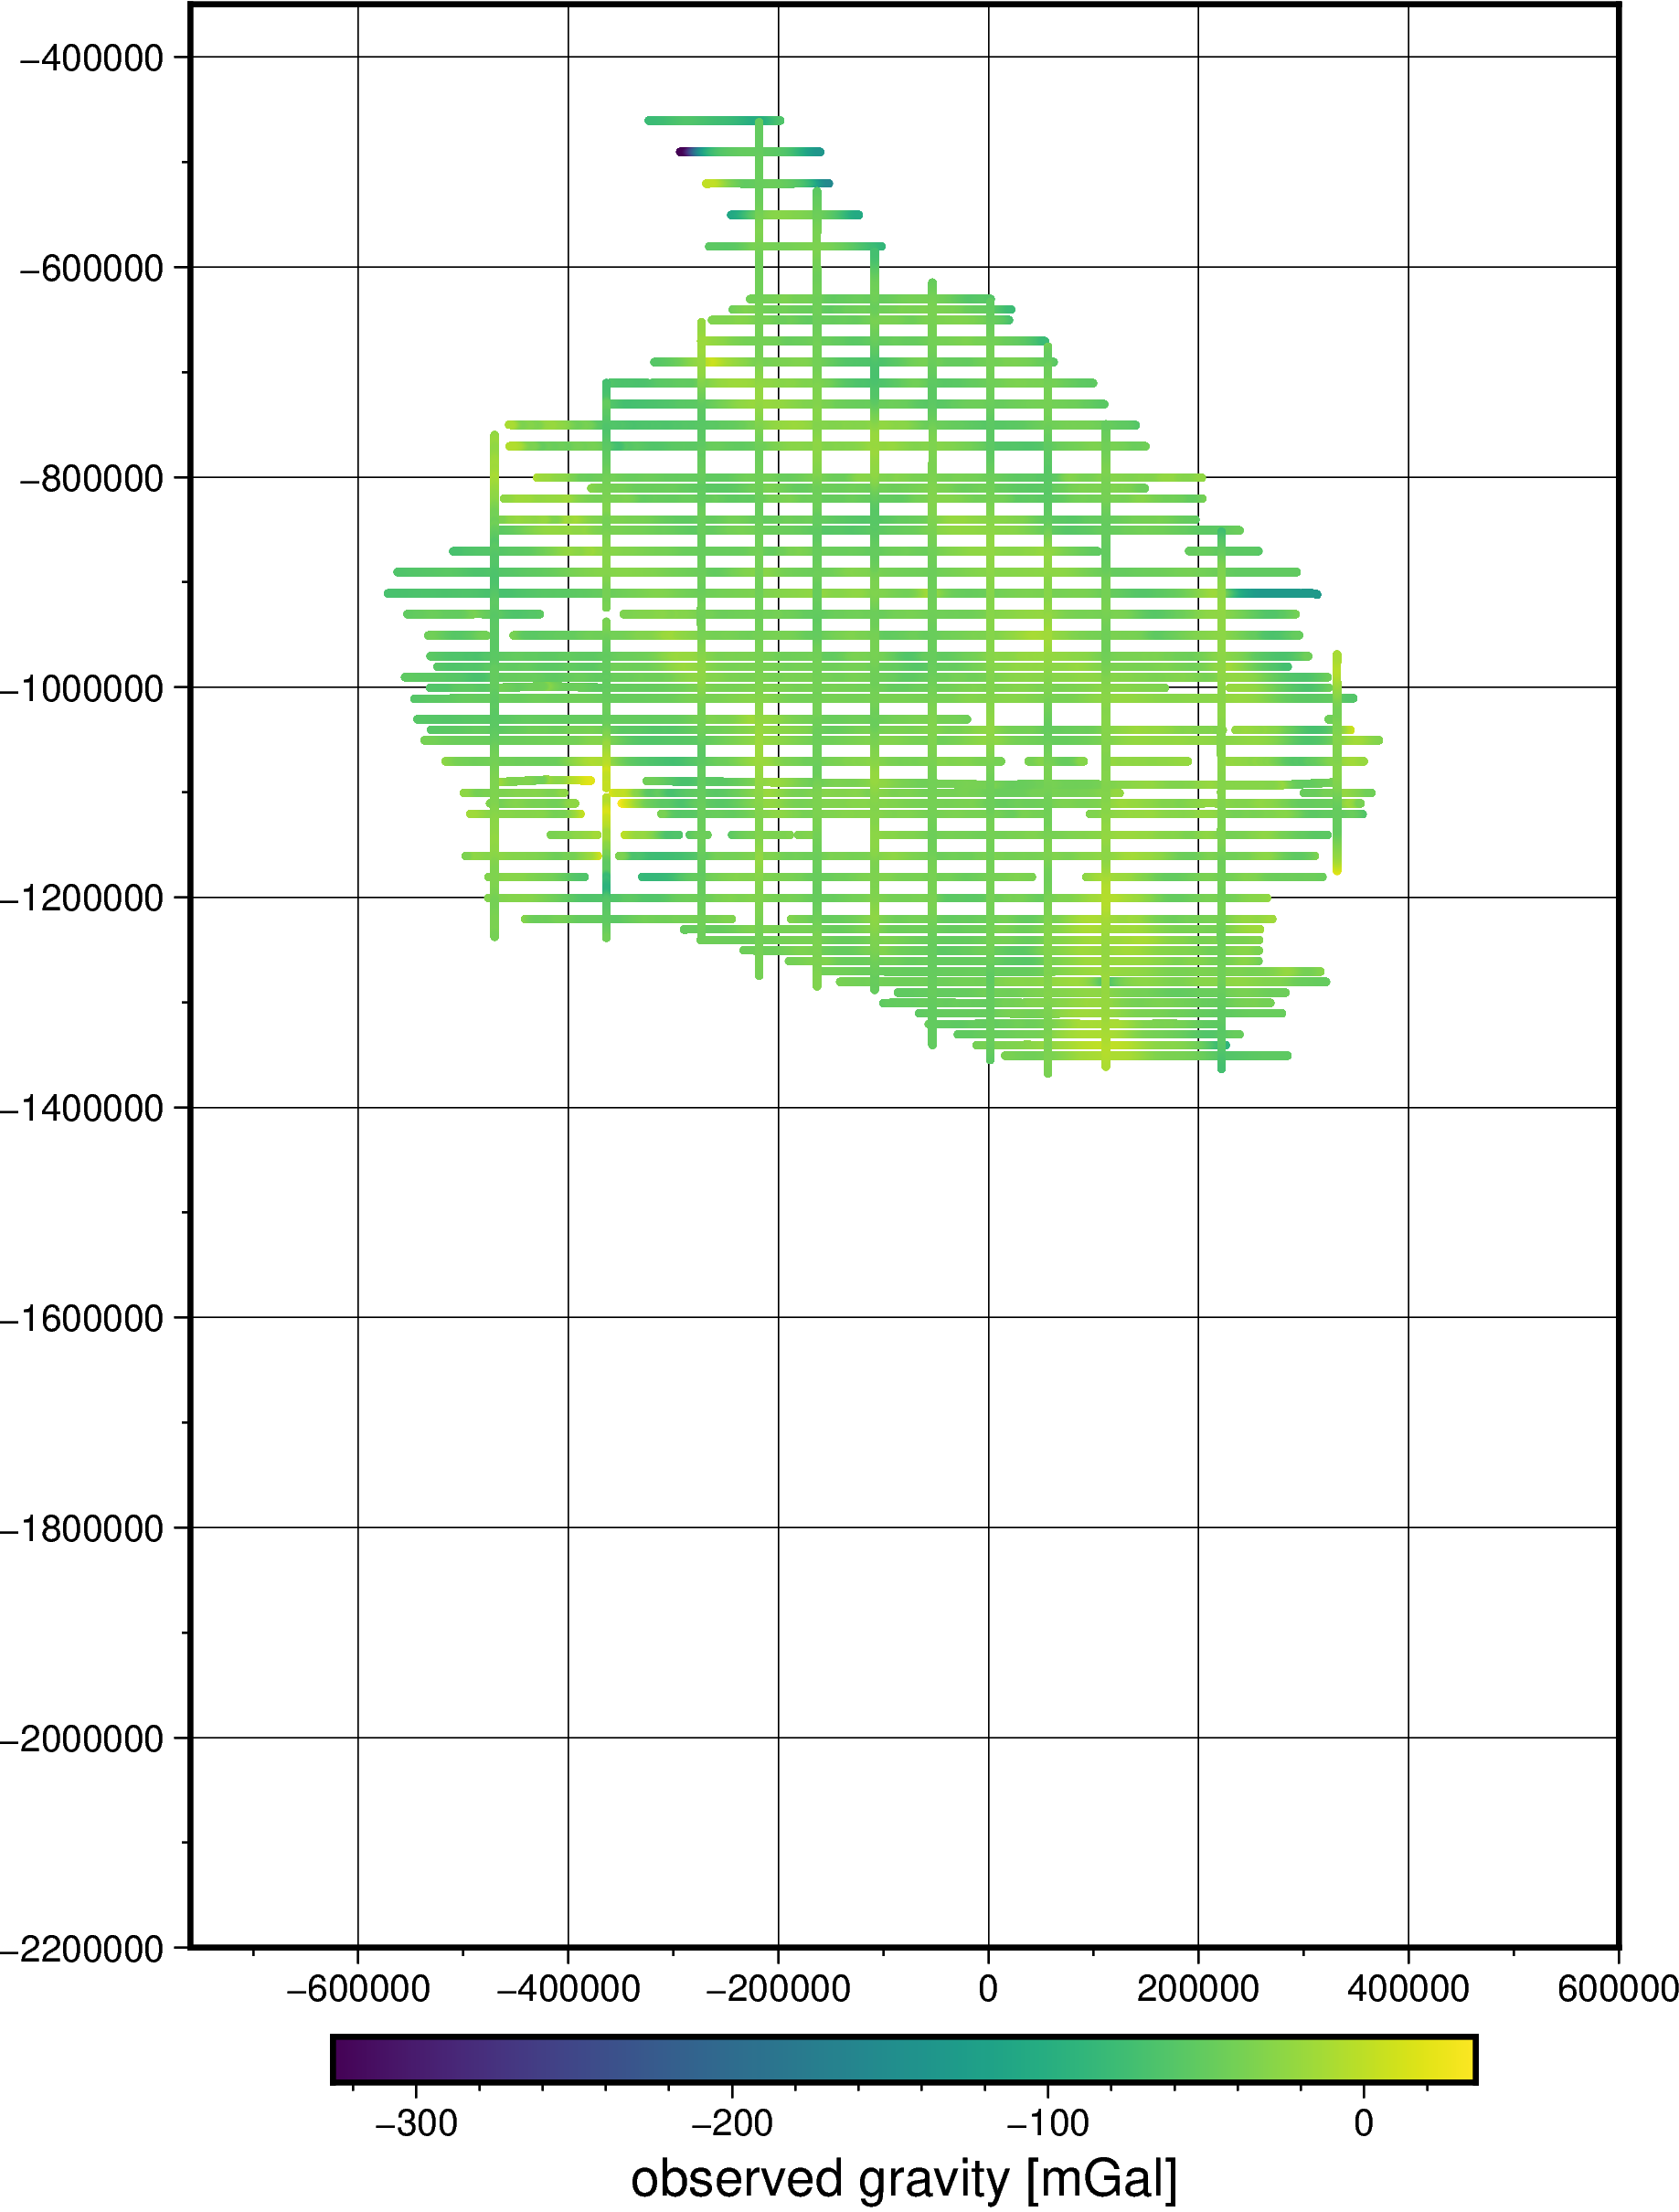

In [10]:
fig = pygmt.Figure()
figheight=180 # in mm
ris_xl= -760_000
ris_yl= -2_200_000 #N extent
ris_xh= 600_000
ris_yh= -350_000 #S extent
figwidth=figheight*(ris_xh-ris_xl)/(ris_yh-ris_yl)
risratio = (ris_yh - ris_yl) / (figheight/1000)
risreg = str(ris_xl) + '/' + str(ris_xh) + '/' + str(ris_yl) + '/' + str(ris_yh) #W/E/S/N
risproj = "x1:" + str(risratio)
antreg = "-3330000/1900000/-3330000/1850000"
risproj_ll = "s0/-90/-71/1:" + str(risratio)
pygmt.makecpt(cmap="viridis", series=[data.FAG_levelled.min(), data.FAG_levelled.max()])
fig.plot(
    x=data.x,
    y=data.y,
    color=data.FAG_levelled,
    cmap=True,
    style="c2p",
    projection=risproj, 
    region=risreg,
    frame="afg",
)
fig.colorbar(frame='af+l"observed gravity [mGal]"')
fig.show()

Also plot the topography grid with the data points overlaid so we can get a sense for how much topographic variation there is and how much we padded the grids.

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


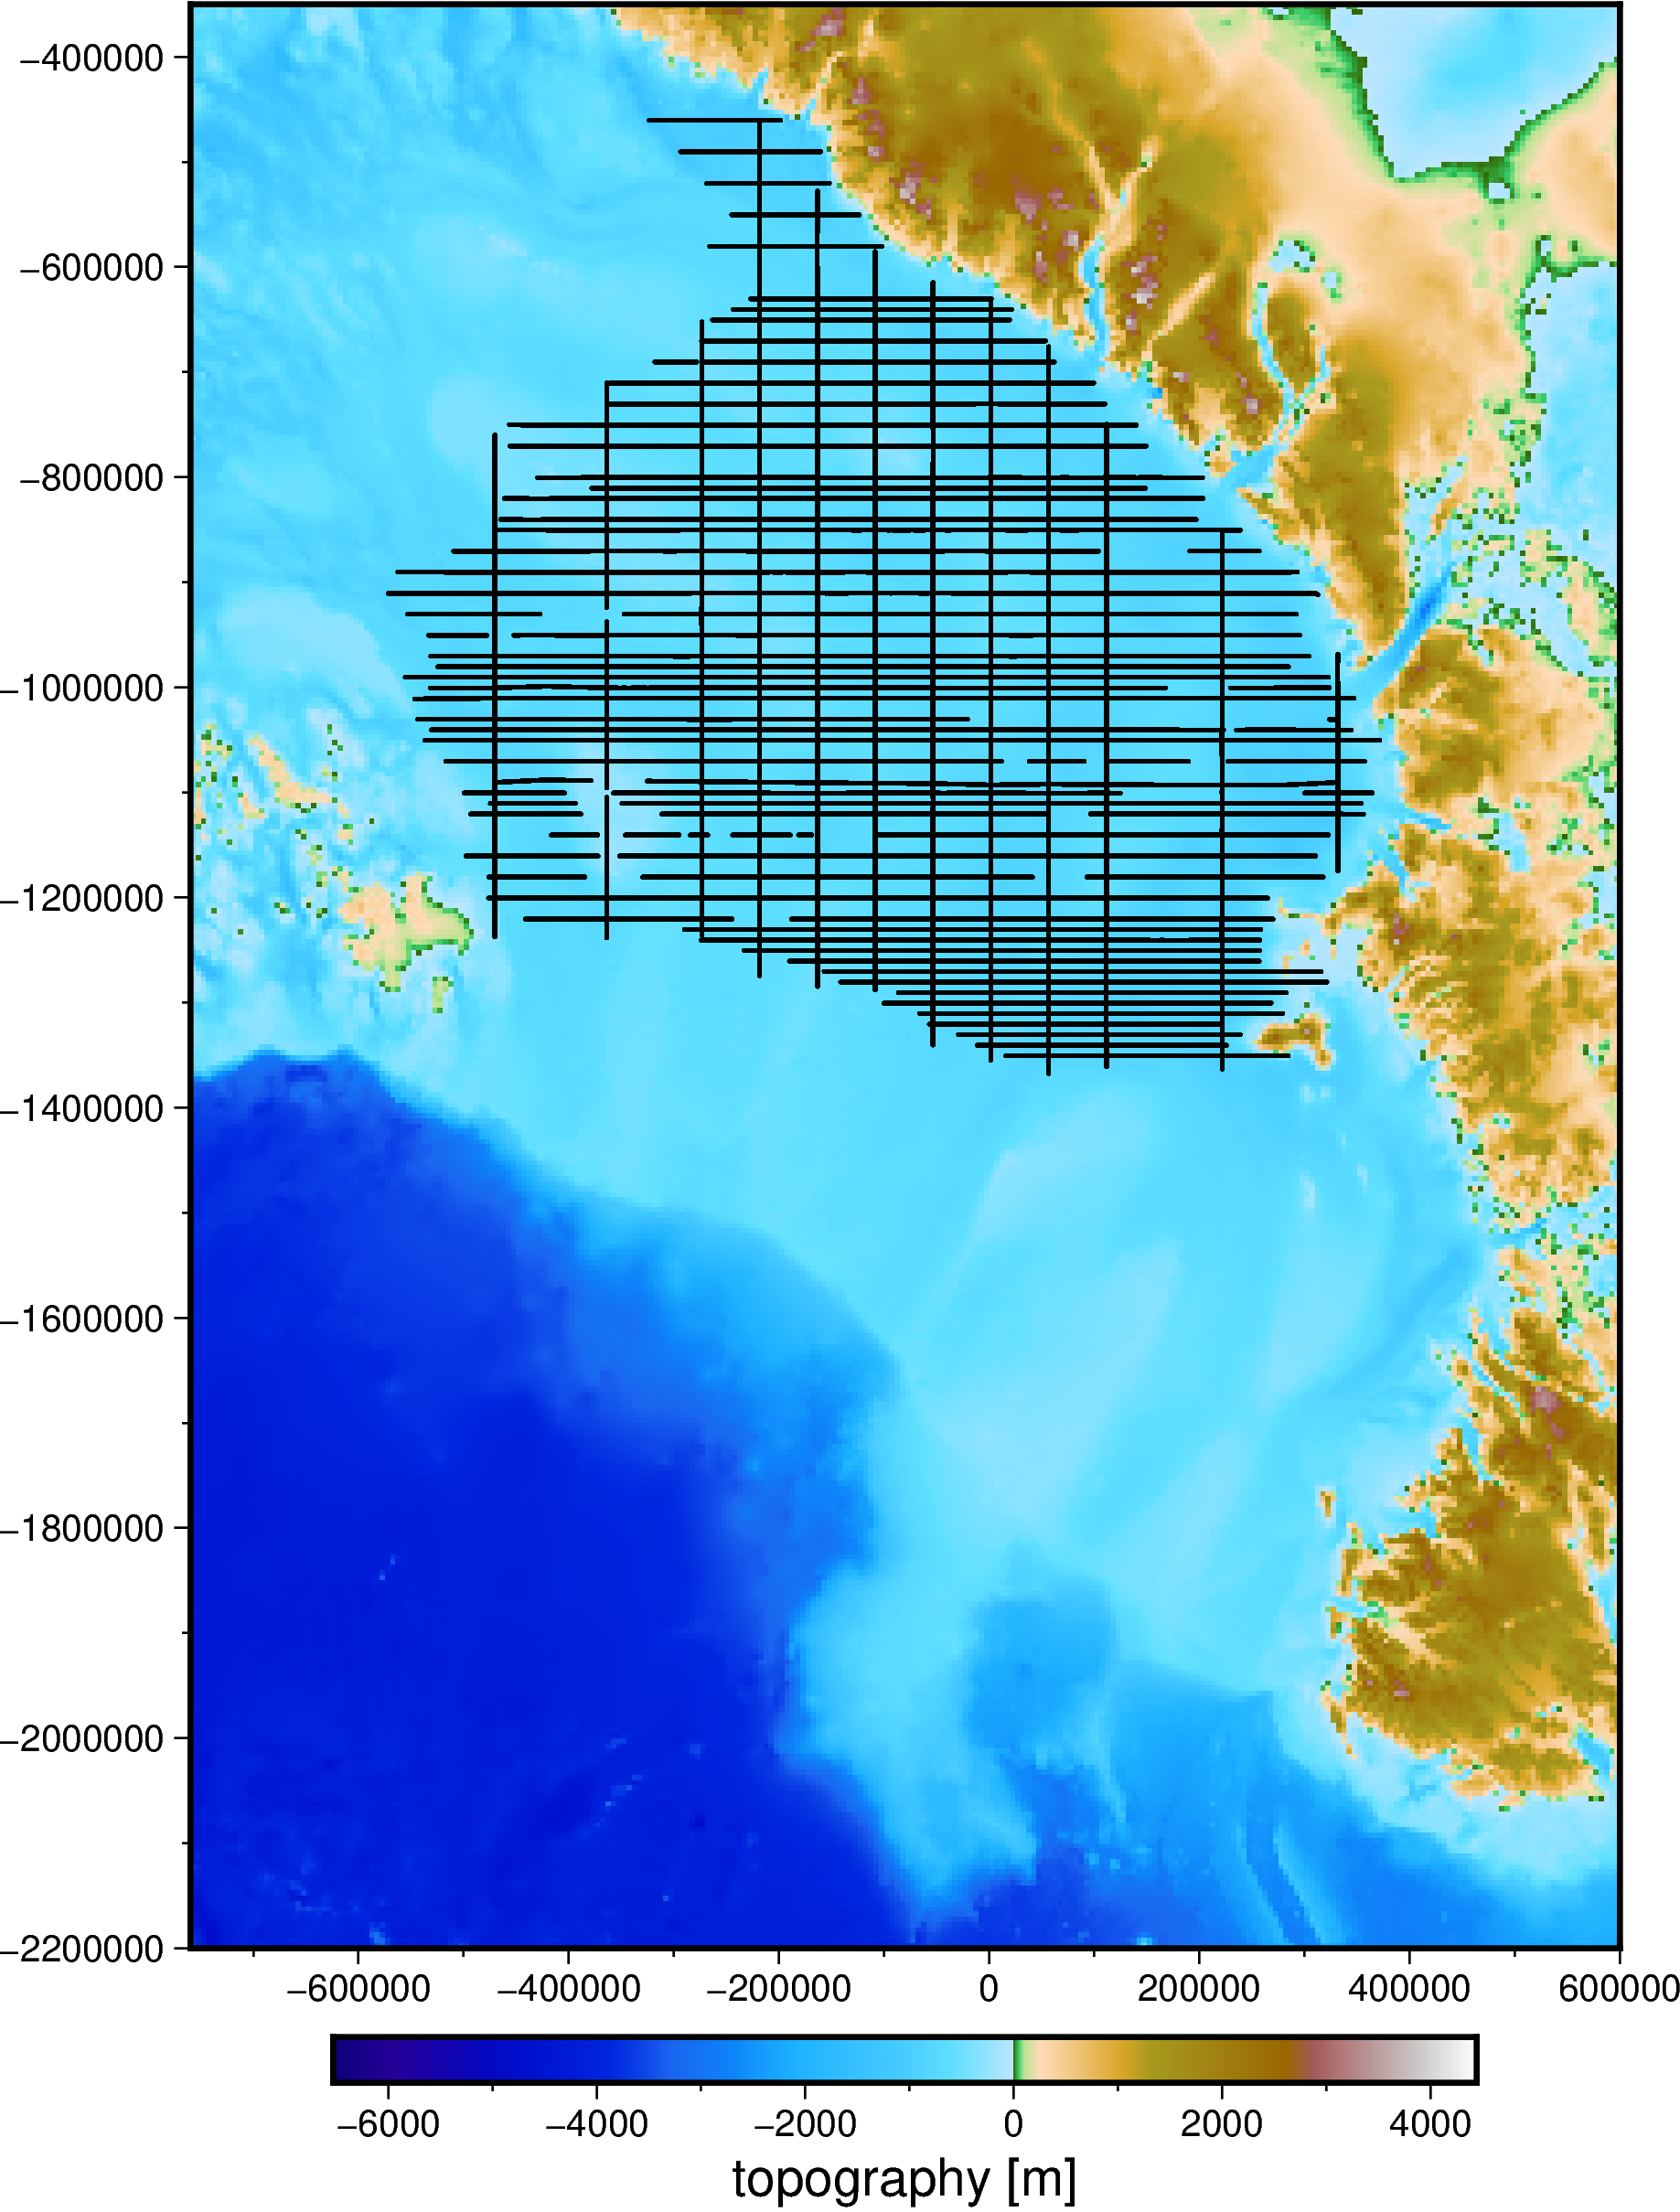

In [11]:
fig = pygmt.Figure()
fig.grdimage(topography, projection=risproj, region=risreg, cmap="etopo1", frame=True)
fig.colorbar(frame='af+l"topography [m]"')
# fig.coast(shorelines="white", area_thresh=1e6)
fig.plot(
    x=data.x,
    y=data.y,
    style="c0.04c",
    color="black",
)
fig.show()

> **NOTE: This topography grid is not ideal for use with gravity processing.** The resolution of the grid is much coarser than our gravity data, which will cause under-correction when we remove the effect of the topography. For this example, we made the trade-off between a less-than-ideal dataset but one that is of manageable size. In practice, **always try to match the spatial resolution of the data and topography grid**.

## Gravity disturbance

The gravity disturbance is defined as:

$$
\delta g (\lambda, \phi, h) = g (\lambda, \phi, h) - \gamma (\lambda, \phi, h)
$$

in which $(\lambda, \phi, h)$ are the longitude, latitude, and geometric height, $g$ is the observed gravity acceleration, and $\gamma$ is the calculated **normal gravity** of a reference ellipsoid. 
Notice that all 3 quantities are located at the same point (the observation point).

> **A note on disturbances vs anomalies:** We want to calculate the disturbance $\delta g(\lambda, \phi, h)$ instead of the traditional "gravity anomaly" $\Delta g(\lambda, \phi) = g(\lambda, \phi, h=N) - \gamma(\lambda, \phi, h=0)$ because the anomaly is not exclusively related to the subsurface density anomalies, while the gravity disturbance is. In fact, it does not even make sense to talk about the "height of the gravity anomaly" since by definition it is only variable in longitude and latitude. Most geophysicists will agree that, in practice, the "height" of observations matter for modeling and interpretation. In most cases, even if we calculate gravity anomalies, we end up pretending that they are gravity disturbances when interpreting the data. So why not calculate disturbances directly?

We can use [Boule](https://www.fatiando.org/boule) to compute the **normal gravity** of the WGS84 reference ellipsoid on any point outside of the ellipsoid using a closed-form equation. This eliminates the need for a free-air correction, which is a rough approximation at best. With that, we can compute the gravity disturbance and store it in our `pandas.DataFrame`.

In [107]:
data = data.assign(
    normal_gravity_mgal=bl.WGS84.normal_gravity(data.latitude, data.Height)
)
data = data.assign(gravity_disturbance_mgal=data.FAG_levelled - data.normal_gravity_mgal)
data

,Line,latitude,longitude,unixtime,Height,x,y,FAG_levelled,normal_gravity_mgal,gravity_disturbance_mgal
0,L20,-85.389220,-156.700683,1.480723e+09,880.889,-198301.708804,-460466.526729,-63.140519,982913.275905,-982976.416424
1,L20,-85.388896,-156.691339,1.480723e+09,880.971,-198390.750930,-460466.568482,-63.149290,982913.245911,-982976.395201
2,L20,-85.388572,-156.682000,1.480723e+09,881.216,-198479.758476,-460466.588212,-63.159926,982913.165681,-982976.325607
3,L20,-85.388248,-156.672664,1.480723e+09,881.580,-198568.724586,-460466.569953,-63.172579,982913.048778,-982976.221357
4,L20,-85.387925,-156.663334,1.480723e+09,882.032,-198657.644906,-460466.543489,-63.187365,982912.904753,-982976.092118
...,...,...,...,...,...,...,...,...,...,...
398274,T1140,-80.595667,161.100852,1.448482e+09,817.745,331759.406956,-969036.957498,-12.251783,982827.328377,-982839.580160
398275,T1140,-80.596495,161.099122,1.448482e+09,817.717,331759.338700,-968941.285651,-12.295090,982827.361263,-982839.656353
398276,T1140,-80.597323,161.097391,1.448482e+09,817.659,331759.285084,-968845.603576,-12.336694,982827.403395,-982839.740090
398277,T1140,-80.598151,161.095659,1.448482e+09,817.589,331759.228735,-968749.915501,-12.376669,982827.449226,-982839.825895


Now plot the gravity disturbance that we just calculated on a map.

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


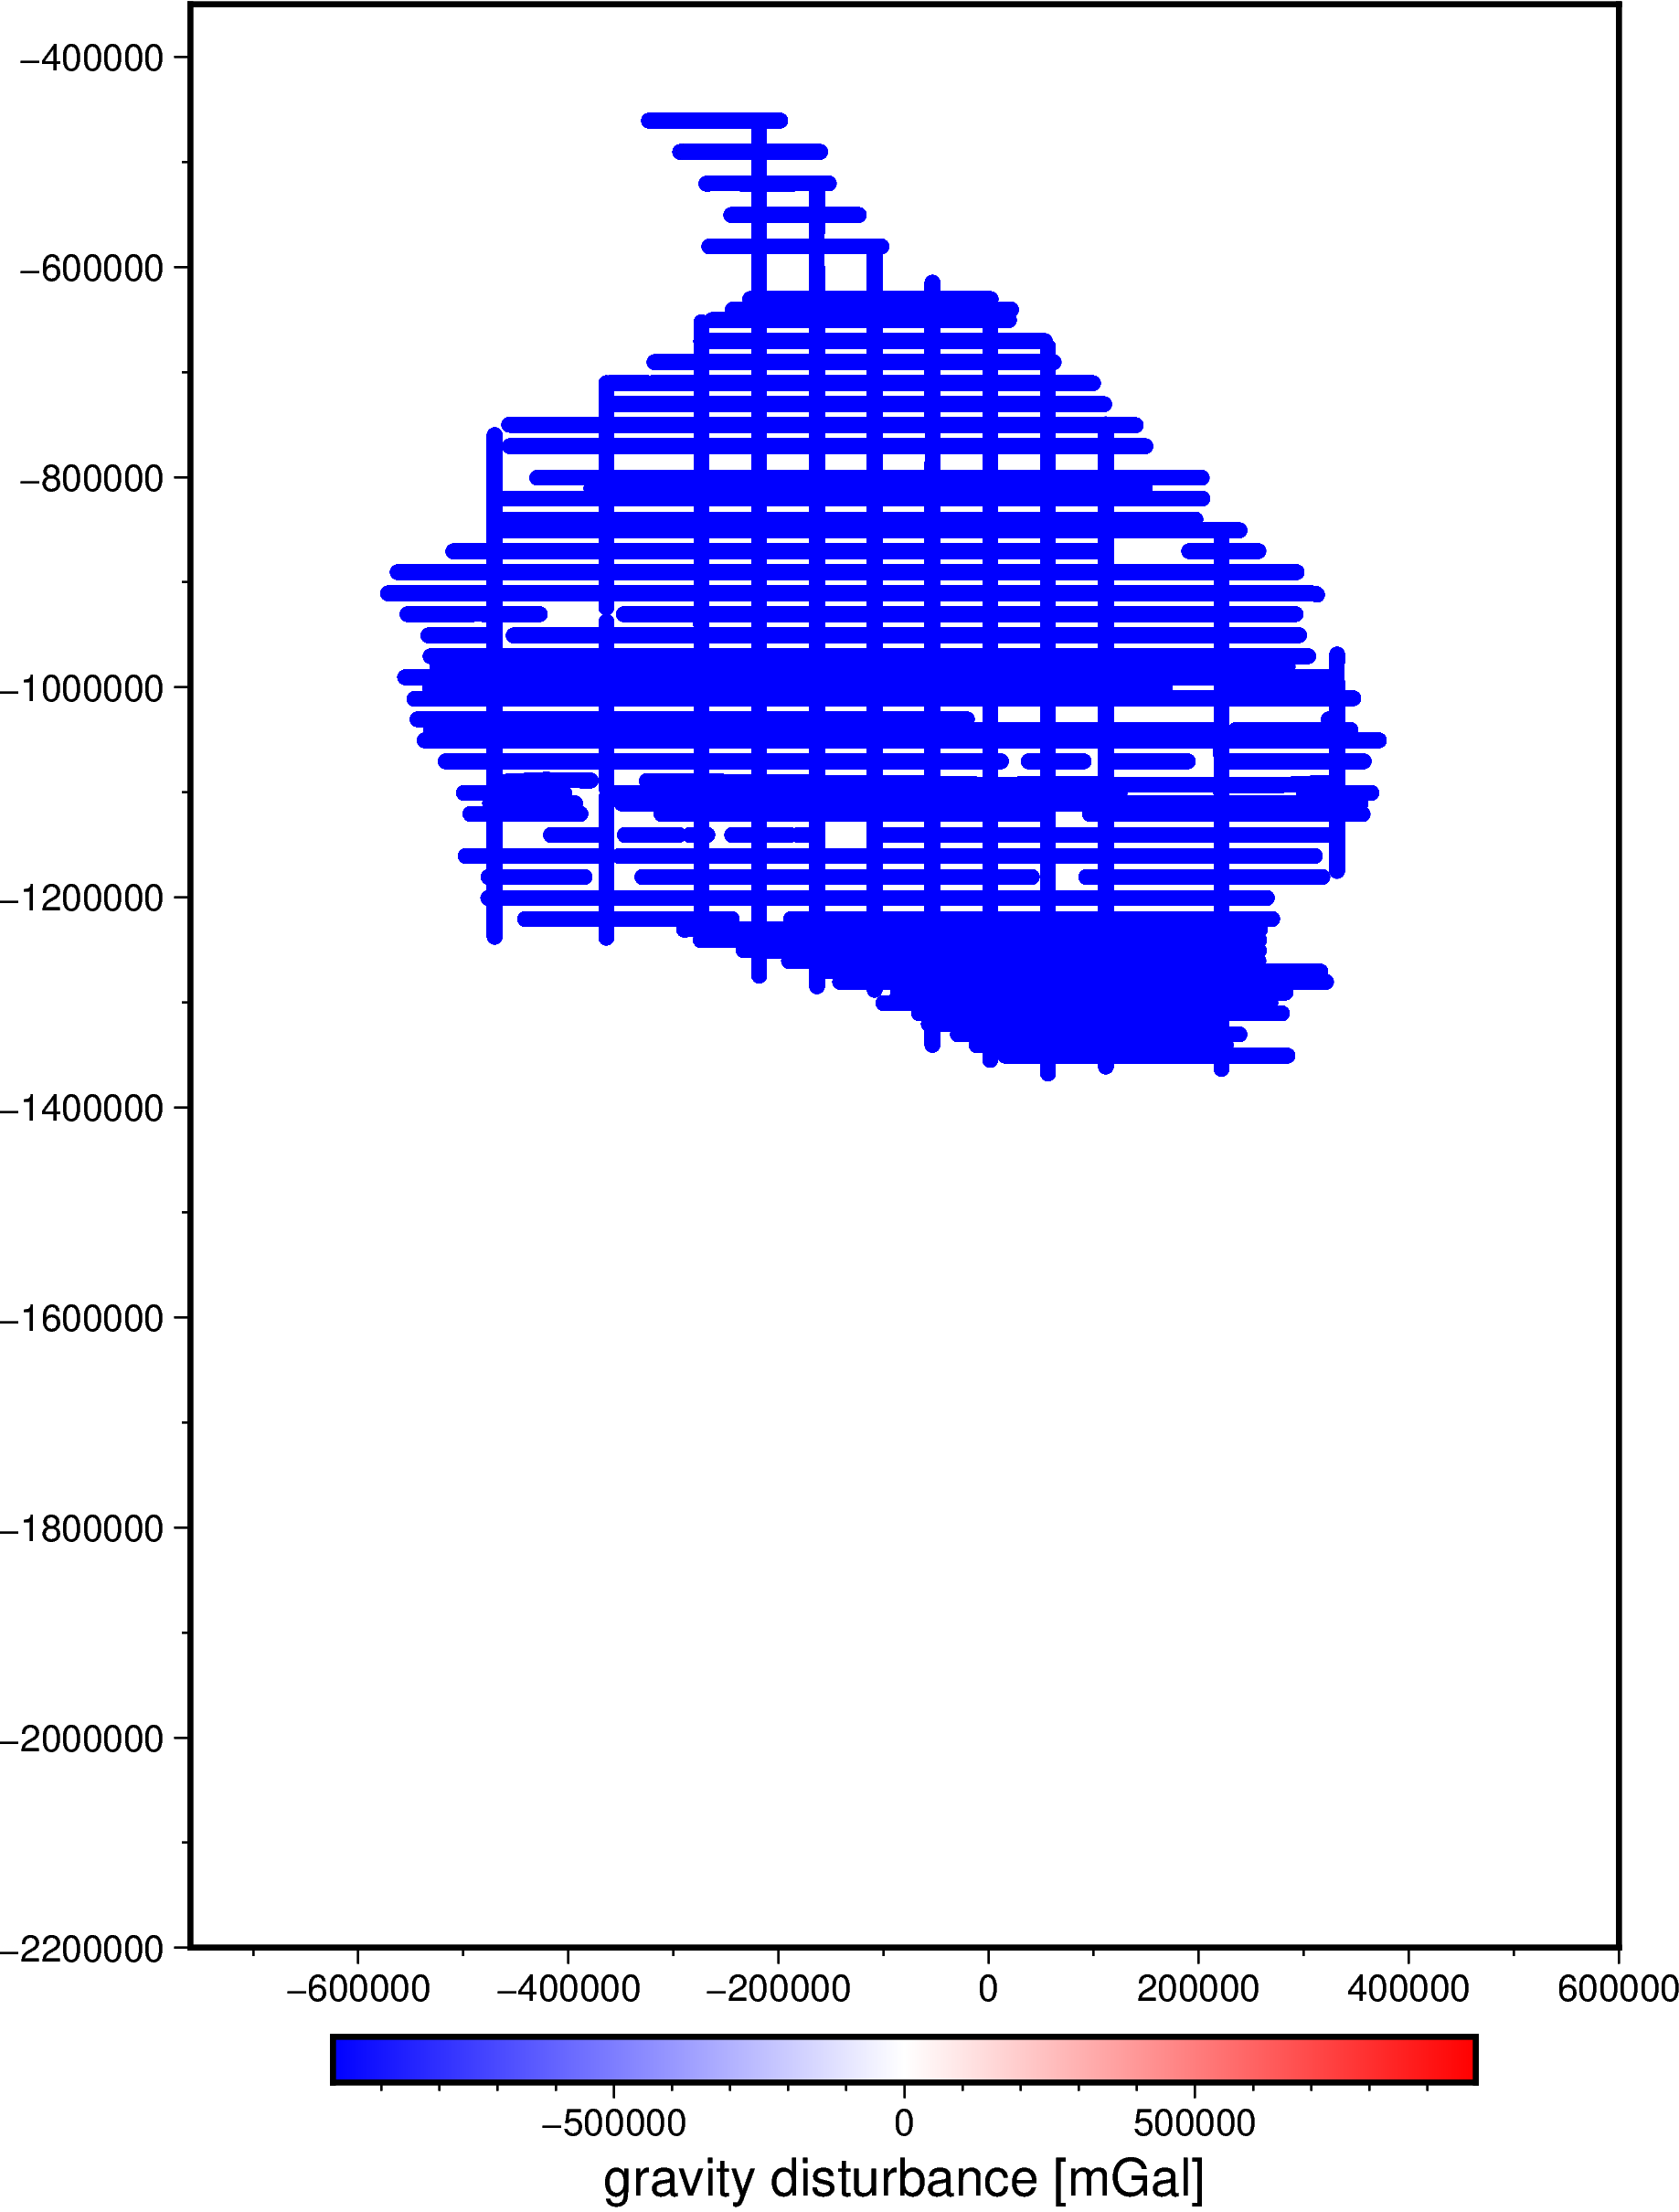

In [109]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_disturbance_mgal)
pygmt.makecpt(cmap="polar+h", series=[-maxabs, maxabs])
fig.plot(
    x=data.x,
    y=data.y,
    color=data.gravity_disturbance_mgal,
    cmap=True,
    style="c4p",
    projection=risproj,
    region=risreg, 
    frame="af",
)
fig.colorbar(frame='af+l"gravity disturbance [mGal]"')
fig.show()

## Topographic correction

Now that we have removed normal gravity and calculated a gravity disturbance, the next step is to remove the effect of the topographic and oceanic masses above and below the ellipsoid. We need to do this in order to isolate the effect of the Bushveld rocks.

We will use [Harmonica](https://www.fatiando.org/harmonica) to calculate and remove the gravitational effect of the topography by modeling the masses as a layer of right-rectangular prisms.

The `prism_layer` function creates a prism model based on a surface undulating around a reference level. In our case, the reference is the ellipsoid (0 height) and the surface is our topography (as geometric heights). The difficult part is assigning the correct density (or density contrast) to each part of our model:

* $\rho = 2670\ kg/m^3$ for continental parts above the ellipsoid
* $\rho = -2670\ kg/m^3$ for continental parts below the ellipsoid 
* $\rho = 1040 - 2670\ kg/m^3$ in the oceans (1040 being an approximate density of ocean water)

Here we'll define "continental" as places with positive orthometric height since 0 orthometric height roughly matches the coastlines.

<figure>
<img src="images/topographic-correction.svg" alt="Sketch of the surfaces and masses involved in topographic correction of gravity disturbances.">
<figcaption><em>
    Sketch of the surfaces and masses involved in topographic correction of gravity disturbances. 
    (CC-BY).
</em></figcaption>
</figure>

> **Note:** There is an extra effect of under- and over-correcting for ocean water in the oceans. This happens because we are assuming that the surface of the water is at 0 geometric height (the surface of the ellipsoid) when in fact it roughly follows the geoid. So in oceanic places where the geoid is below the ellipsoid, we correct for water where there was none and vice-versa. Luckily, this effect is negligible here since our study area is relatively far away from the ocean. We can safely ignore this correction but it should be performed when close to the coast or directly above the oceans.

In [12]:
topo_x=list(topography.x)
topo_y=list(topography.y)


In [13]:
# Start by placing the continental density above and below the ellipsoid
topography_density = np.where(topography > 0, 2670, -2670)
# Now correct the value in the oceans (topography < 0)
topography_density = np.where(topography < 0, 1040 - 2670, topography_density)
# Create the prism model of the topographic masses
topography_model = hm.prism_layer(
    coordinates=(topo_x, topo_y),
    surface=topography,
    reference=0,
    properties={"density": topography_density}
)
topography_model

<xarray.Dataset>
Dimensions:   (northing: 1036, easting: 1046)
Coordinates:
  * easting   (easting) float64 -3.328e+06 -3.322e+06 ... 1.892e+06 1.898e+06
  * northing  (northing) float64 -3.328e+06 -3.322e+06 ... 1.842e+06 1.848e+06
    top       (northing, easting) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    bottom    (northing, easting) float64 -4.842e+03 -4.876e+03 ... -3.361e+03
Data variables:
    density   (northing, easting) int32 -1630 -1630 -1630 ... -1630 -1630 -1630
Attributes:
    coords_units:      meters
    properties_units:  SI

To help us visually what this correction is doing, let's take a look at the density that we assigned across our topographic model.

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


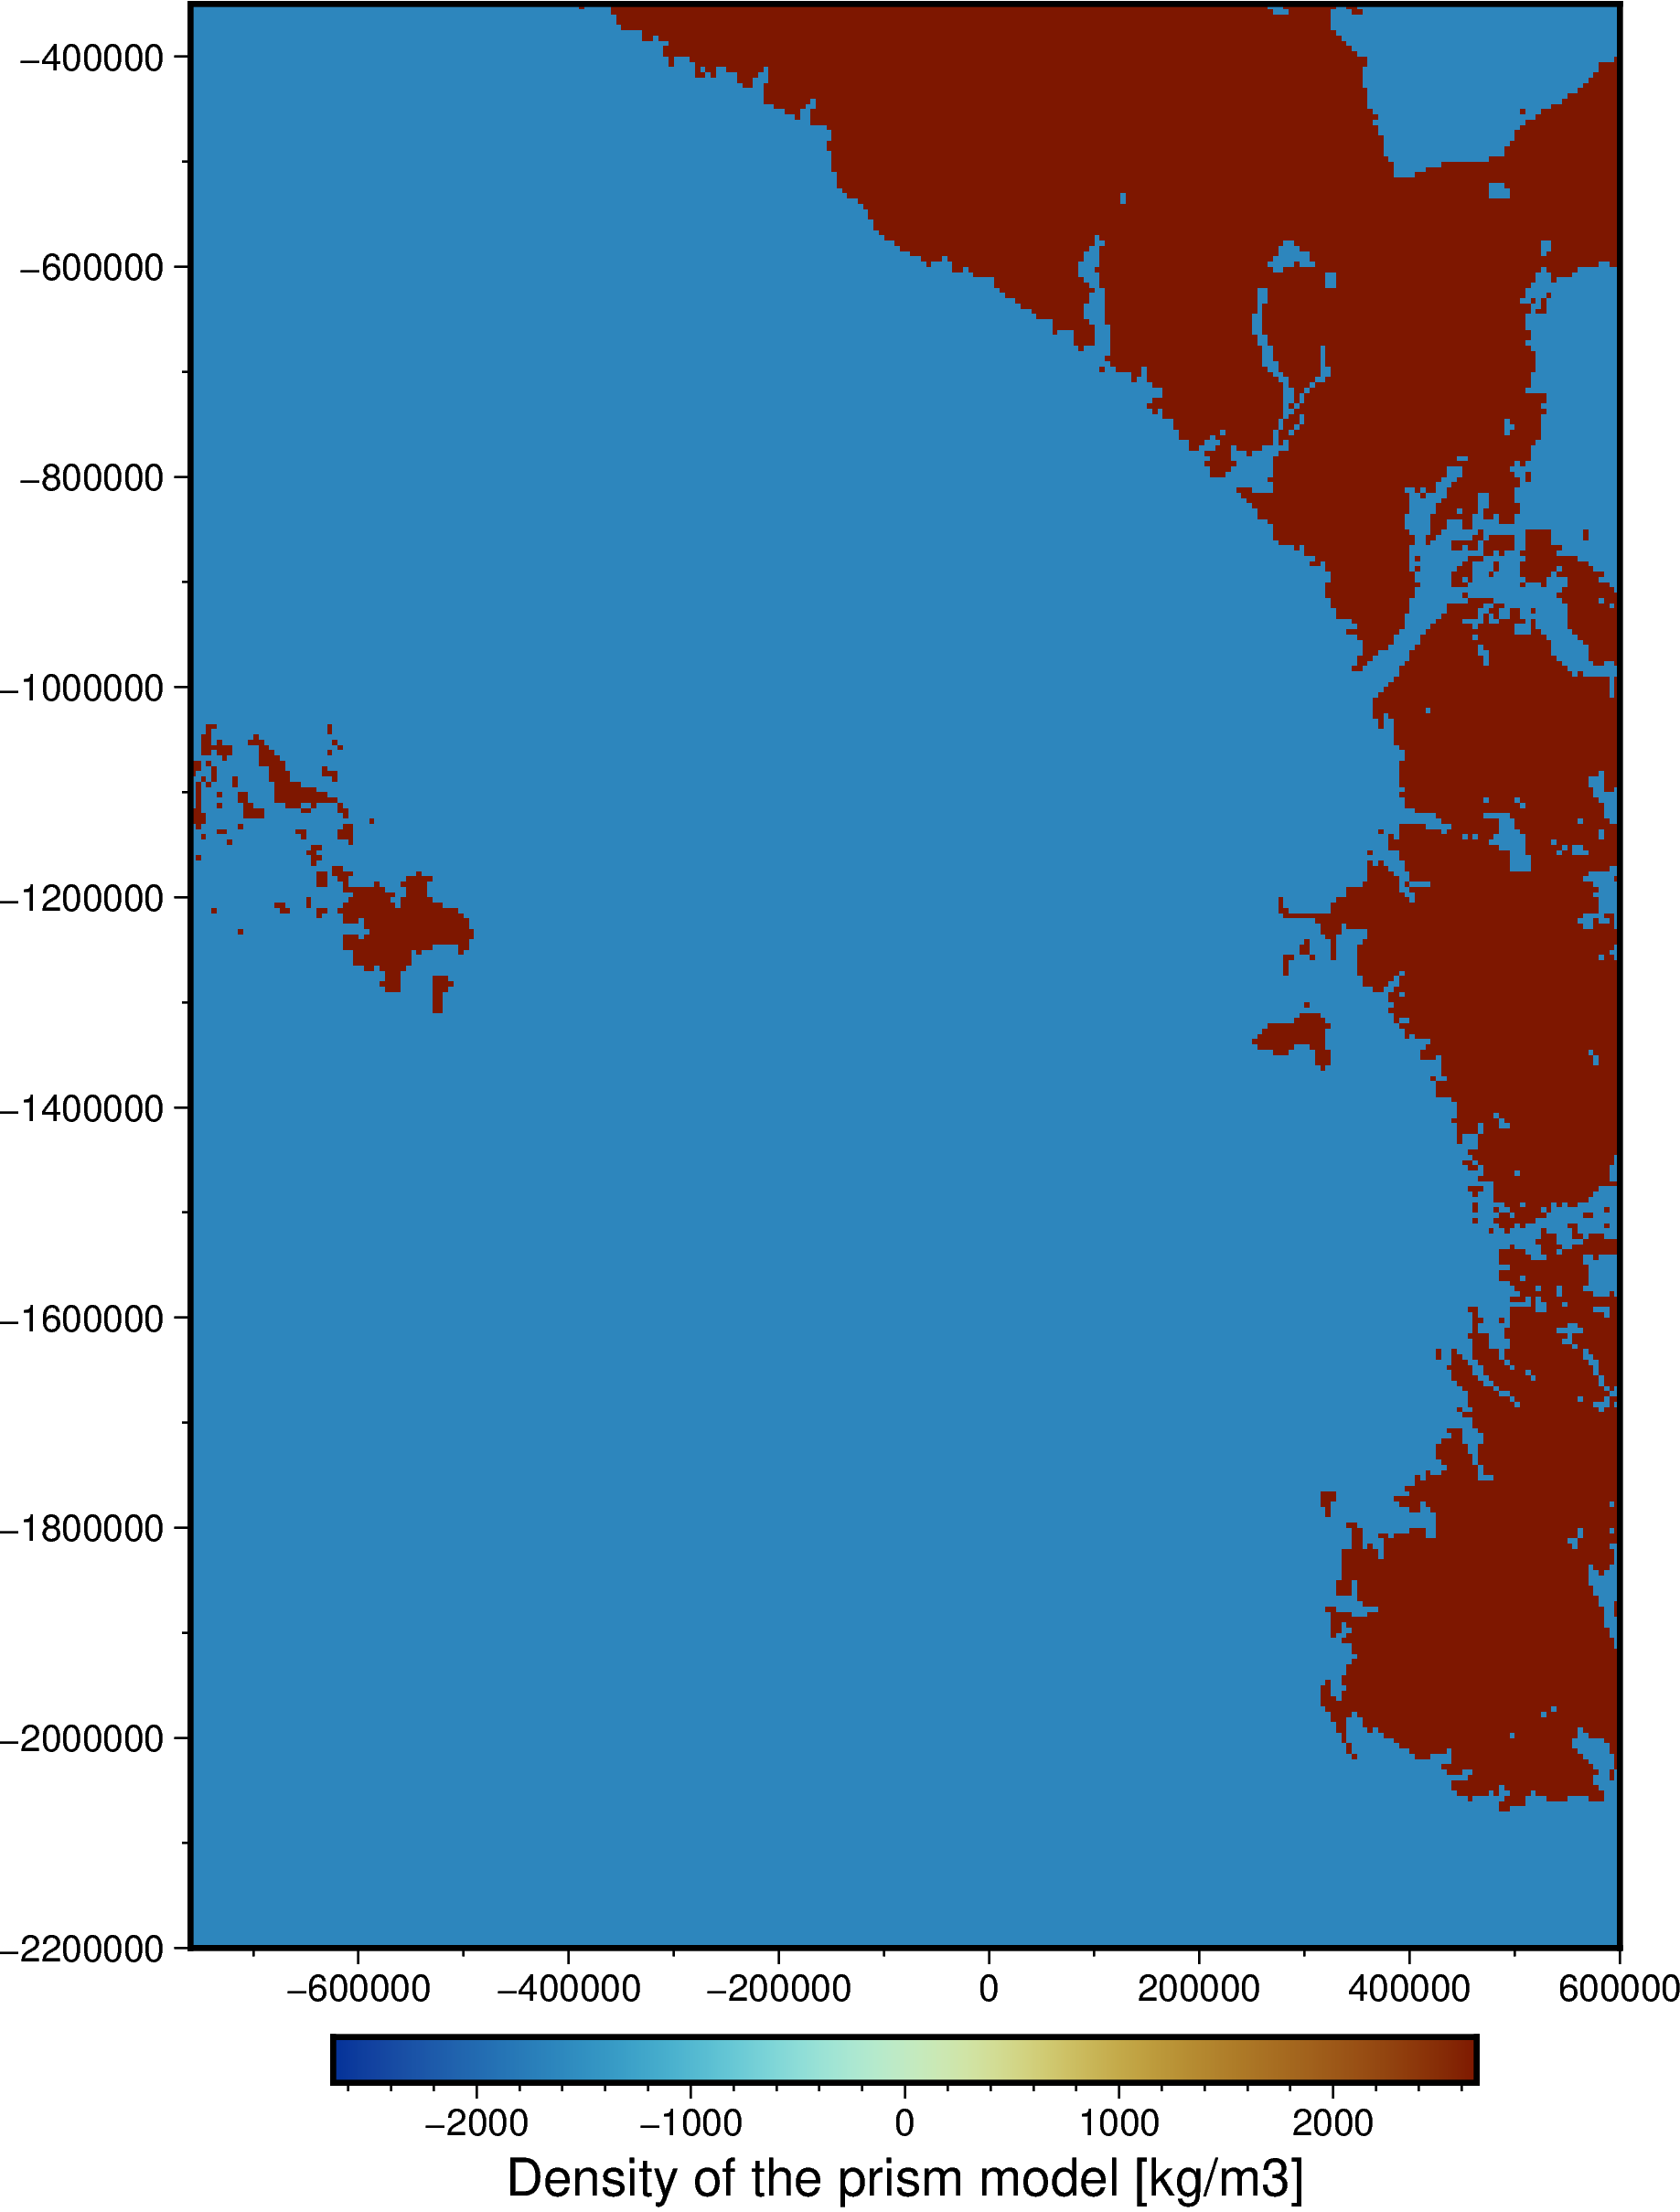

In [14]:
fig = pygmt.Figure()
scale = vd.maxabs(topography_model.density)
pygmt.makecpt(cmap="roma+h", reverse=True, series=[-scale, scale])
fig.grdimage(topography_model.density, projection=risproj, region=risreg, frame=True)
fig.colorbar(frame='af+l"Density of the prism model [kg/m3]"')
fig.show()

As prescribed by the model, the density is 2670 kg/m³ in the continents and 1040 - 2670 kg/m³ in the oceans. The exceptions are parts of the continents that are below 0 geometric height, which have a density of -2670 kg/m³.

Now we can forward model the gravitational effect of the topographic/bathymetric masses at the data points and remove it from our gravity disturbance to calculate a **topography-free (Bouguer) disturbance**.

In [ ]:
coordinates = (data.x, data.y, data.Height)
data = data.assign(
    terrain_effect_mgal=topography_model.prism_layer.gravity(coordinates, field="g_z"),
)
data = data.assign(
    gravity_bouguer_mgal=data.FAG_levelled - data.terrain_effect_mgal
)
data

Plot the Bouguer disturbance on a map so we can see what we have.

In [ ]:
fig = pygmt.Figure()
maxabs = vd.maxabs(data.gravity_bouguer_mgal)
pygmt.makecpt(cmap="polar", series=[-maxabs, maxabs])
fig.plot(
    x=data.x,
    y=data.y,
    color=data.gravity_bouguer_mgal,
    cmap=True,
    style="c2p",
    projection=risproj, region=risreg, 
    frame=True,
)
fig.colorbar(frame='af+l"Bouguer disturbance [mGal]"')
fig.show()

In [ ]:
fig.show()

As expected, the values are mostly negative and are dominated by the Moho signal.

## Regional-residual separation


Bouguer gravity is dominated by the effect of variations in Moho depth because it involves large density contrasts and thicknesses. If we want to see the signal from the shallower intrusions of the Bushveld (often called the **residual**), we'll need to remove the effect of the deeper and larger sources (often called the **regional**).

Traditionally, this is done by fitting a low-degree 2D polynomial to the data and using it as the regional field. We could do this with `verde.Trend` but we'll use a different (and better) approach. The reason for not using a polynomial is that it doesn't take into account the variable height of the observations or the physical nature of the data (a potential field). 

A possible alternative would be to model and remove the Moho effect via an Airy isostasy model, which assumes that all topography is locally compensated by the Moho depth variation. This could be done with `harmonica.isostasy_airy` to calculate the Moho depth, followed by `harmonica.prism_layer` to calculate and remove its gravitational effect.

Here, we will use a simpler approach with the **equivalent sources** present in Harmonica to fit a set of deep point sources to the data. 

<figure>
<img src="images/equivalent-sources.svg" alt="Sketch equivalent sources method to perform interpolation or predict residuals.">
<figcaption><em>
    Sketch equivalent sources method to perform interpolation or predict residuals.
    (CC-BY).
</em></figcaption>
</figure>

Setting a large depth for the sources means that their field will be long-wavelength and is a good way to represent our regional. The choice of depth is somewhat subjective (as is the choice of polynomial degree) and will depend on the interpretation of the results.

> **Note**: The equivalent sources approach may have trouble scaling to large datasets. New features in Harmonica are in development to account for this and should be released with the next version of the package. For the moment, it is recommended to pass the data through a `verde.BlockMean` prior to fitting the deep sources to avoid running out of memory.

In [22]:
# Create a set of deep sources at a depth of 500 km
deep_sources = hm.EquivalentSources(damping=1000, depth=500e3)
# Fit the sources to the data
deep_sources.fit((data.easting_m, data.northing_m, data.Height), data.gravity_bouguer_mgal)

# Use the sources to predict the regional field
data = data.assign(
    gravity_regional_mgal=deep_sources.predict((data.easting_m, data.northing_m, data.Height))
)
# Calculate a residual field (which is what we want)
data = data.assign(
    gravity_residual_mgal=data.gravity_bouguer_mgal - data.gravity_regional_mgal
)
data

C:\Users\matthewt\Anaconda3\envs\fatiando\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,longitude,latitude,height_sea_level_m,gravity_mgal,easting_m,northing_m,geoid_m,height_geometric_m,normal_gravity_mgal,gravity_disturbance_mgal,terrain_effect_mgal,gravity_bouguer_mgal,gravity_regional_mgal,gravity_residual_mgal
8648,25.01500,-26.26334,1230.2,978681.38,2.526066e+06,-2.733052e+06,27.302536,1257.502536,978656.289769,25.090231,139.812249,-114.722018,-116.712155,1.990137
8649,25.01932,-26.38713,1297.0,978669.02,2.526503e+06,-2.746924e+06,27.659737,1324.659737,978644.455439,24.564561,145.905545,-121.340984,-116.655864,-4.685120
8650,25.02499,-26.39667,1304.8,978669.28,2.527075e+06,-2.747994e+06,27.689820,1332.489820,978642.725739,26.554261,145.905317,-119.351056,-116.674517,-2.676540
8651,25.04500,-26.07668,1165.2,978681.08,2.529096e+06,-2.712163e+06,26.915163,1192.115163,978663.122713,17.957287,129.444479,-111.487193,-116.909344,5.422152
8652,25.07668,-26.35001,1262.5,978665.19,2.532295e+06,-2.742763e+06,27.540560,1290.040560,978652.468478,12.721522,142.540230,-129.818707,-116.931033,-12.887675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12974,31.51500,-23.86333,300.5,978776.85,3.182450e+06,-2.466945e+06,12.527840,313.027840,978781.535934,-4.685934,34.376896,-39.062830,-56.223067,17.160237
12975,31.52499,-23.30000,280.7,978798.55,3.183459e+06,-2.405224e+06,11.987479,292.687479,978750.536972,48.013028,29.023204,18.989825,-49.678543,68.668368
12976,31.54832,-23.19333,245.7,978803.55,3.185814e+06,-2.393567e+06,11.897978,257.597978,978754.386590,49.163410,20.736237,28.427173,-48.047643,76.474815
12977,31.57333,-23.84833,226.8,978808.44,3.188340e+06,-2.465298e+06,12.483330,239.283330,978803.297086,5.142914,18.758079,-13.615165,-54.873920,41.258755


Plot a map of the residual field. This should resemble what we know about the geology of the Bushveld.

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


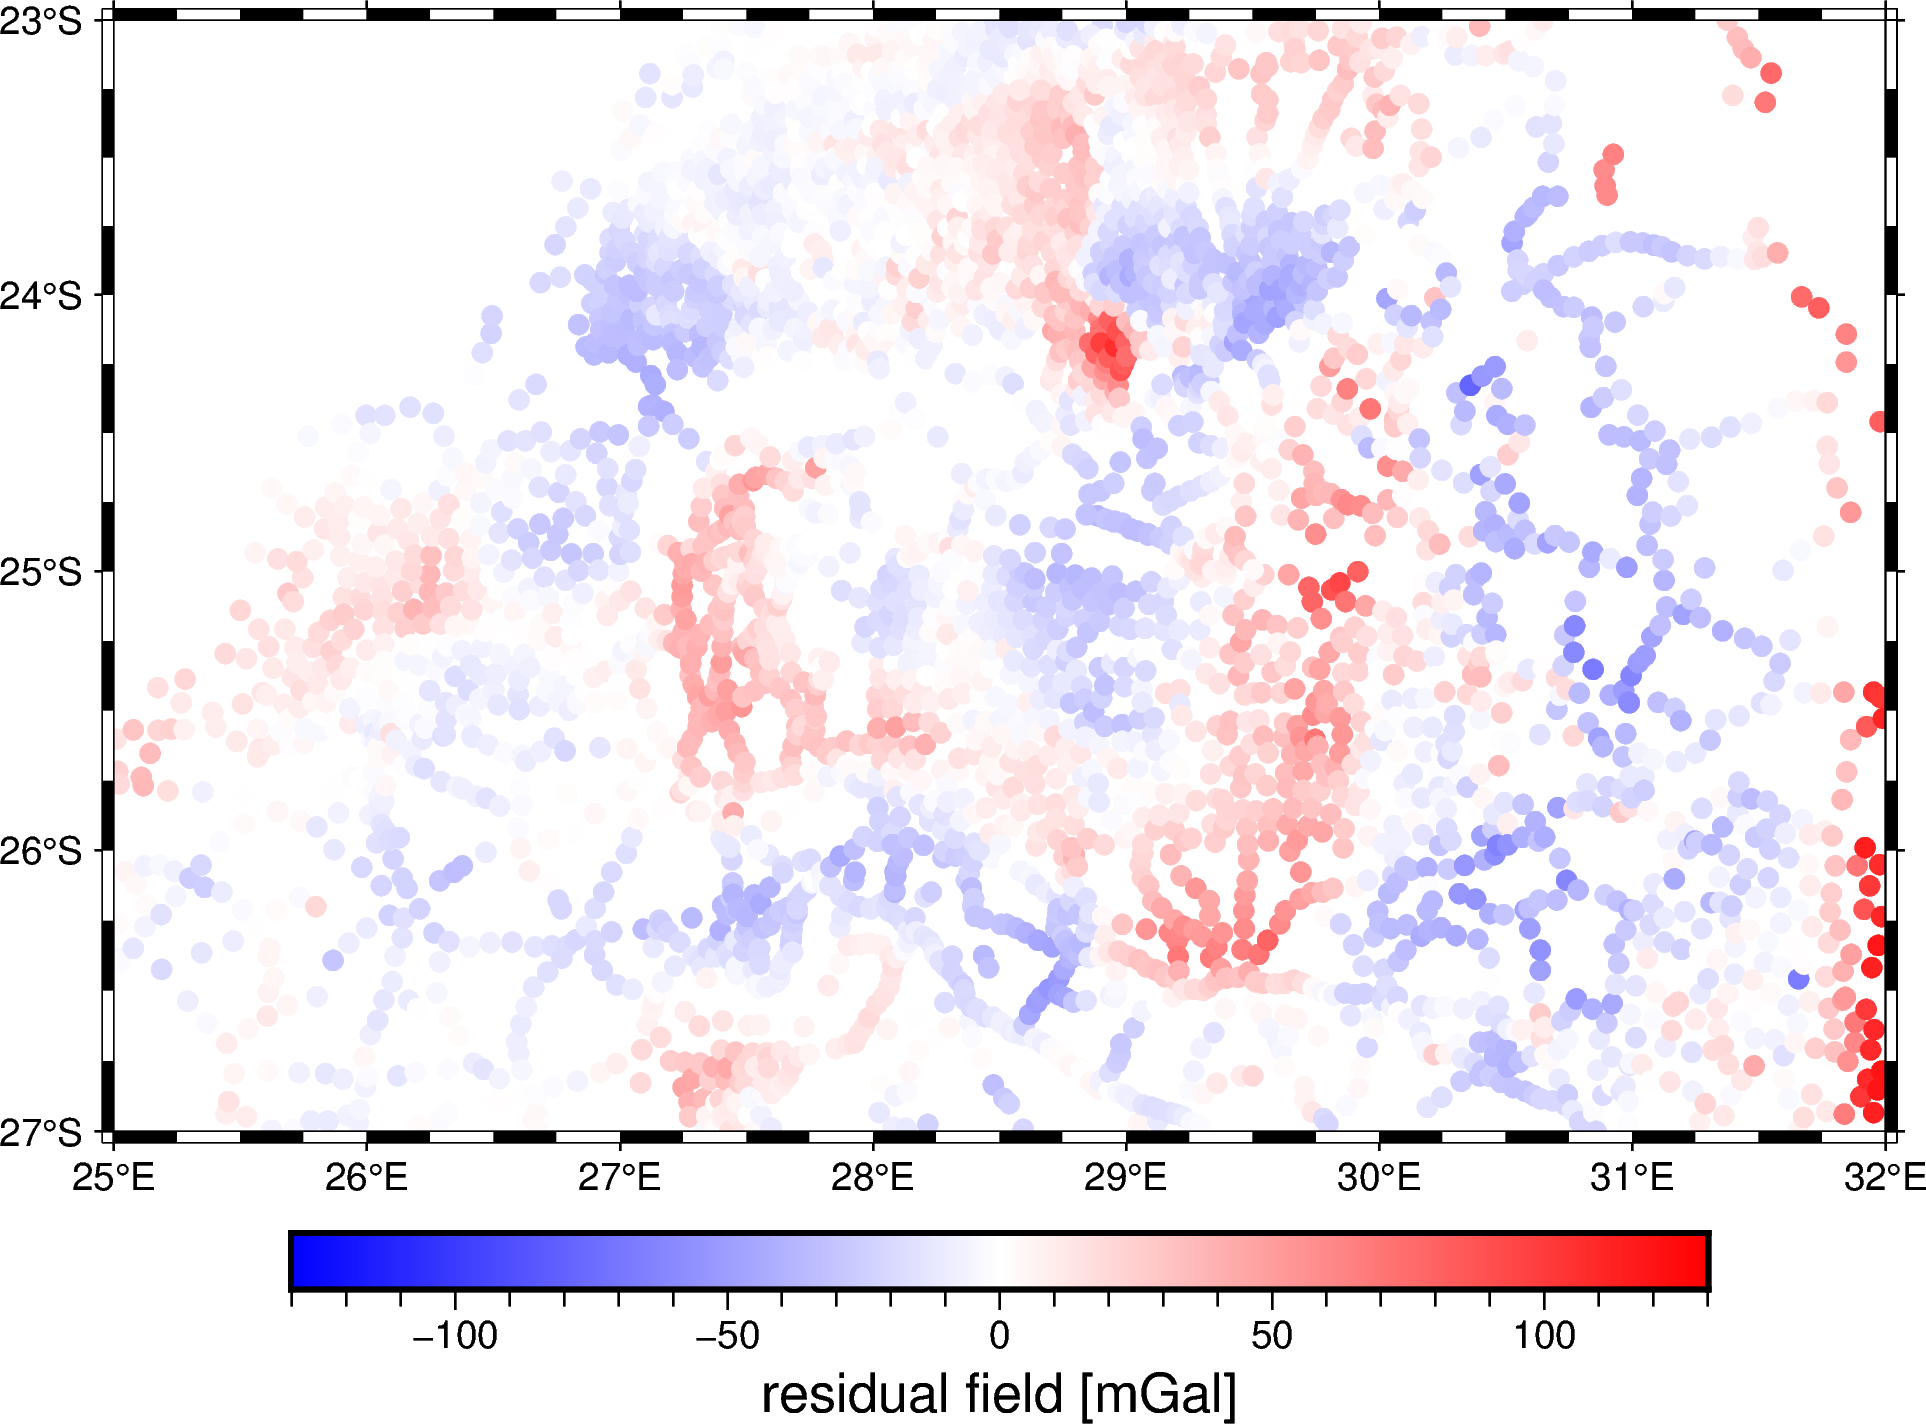

In [23]:
fig = pygmt.Figure()
scale = vd.maxabs(data.gravity_residual_mgal)
pygmt.makecpt(cmap="polar", series=[-scale, scale])
fig.plot(
    x=data.longitude,
    y=data.latitude,
    color=data.gravity_residual_mgal,
    cmap=True,
    style="c5p",
    projection="M15c", 
    frame=True,
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.show()

## Grid the residuals

Finally, we can create a regular grid of the residuals at a uniform height. This is a good way to aid visualization and would also allow us to do calculations involving Fourier transforms and other techniques that required gridded data.

The best way to achieve this is, again, the **equivalent sources** in Harmonica. This method allows us to predict the data values on a grid at whatever height we wish (effectively upward-continuing the data), all in a single step. Since our goal here is to accurately model and predict the residual field, we'll use a shallower depth so that the sources can reproduce the short wavelengths in our data.

In [24]:
eqs = hm.EquivalentSources(damping=10, depth=10e3)
eqs.fit((data.easting_m, data.northing_m, data.Height), data.gravity_residual_mgal)

C:\Users\matthewt\Anaconda3\envs\fatiando\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


EquivalentSources(damping=10, depth=10000.0)

Now use the equivalent source model to predict data values on a regular grid at a uniform height. In this case, we will use a height that is slightly larger than the highest observation point to avoid downward continuation. As a bonus, we can pass the projection functions that we used earlier to generate a grid in **geographic coordinates** (longitude, latitude) instead of Cartesian.

In [25]:
residual_grid = hm.grid(
    upward=2200,  # Height in meters
    region=region,
    spacing=2 / 60,  # Decimal degrees
    data_names=["gravity_residual"],
    dims=("latitude", "longitude"),
    projection=projection,
)
residual_grid

<xarray.Dataset>
Dimensions:           (latitude: 121, longitude: 211)
Coordinates:
  * longitude         (longitude) float64 25.0 25.03 25.07 ... 31.93 31.97 32.0
  * latitude          (latitude) float64 -27.0 -26.97 -26.93 ... -23.03 -23.0
    upward            (latitude, longitude) float64 2.2e+03 2.2e+03 ... 2.2e+03
Data variables:
    gravity_residual  (latitude, longitude) float64 0.7897 0.8992 ... 19.54
Attributes:
    metadata:  Generated by EquivalentSources(damping=10, depth=10000.0)

Plot the gridded residuals on a map and overlay the observation points. It's always important to know where the actual data points are so we can avoid interpreting features in the grid that are likely just an artifact of the data sampling. This is particularly important in areas with sparse and uneven data coverage.

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


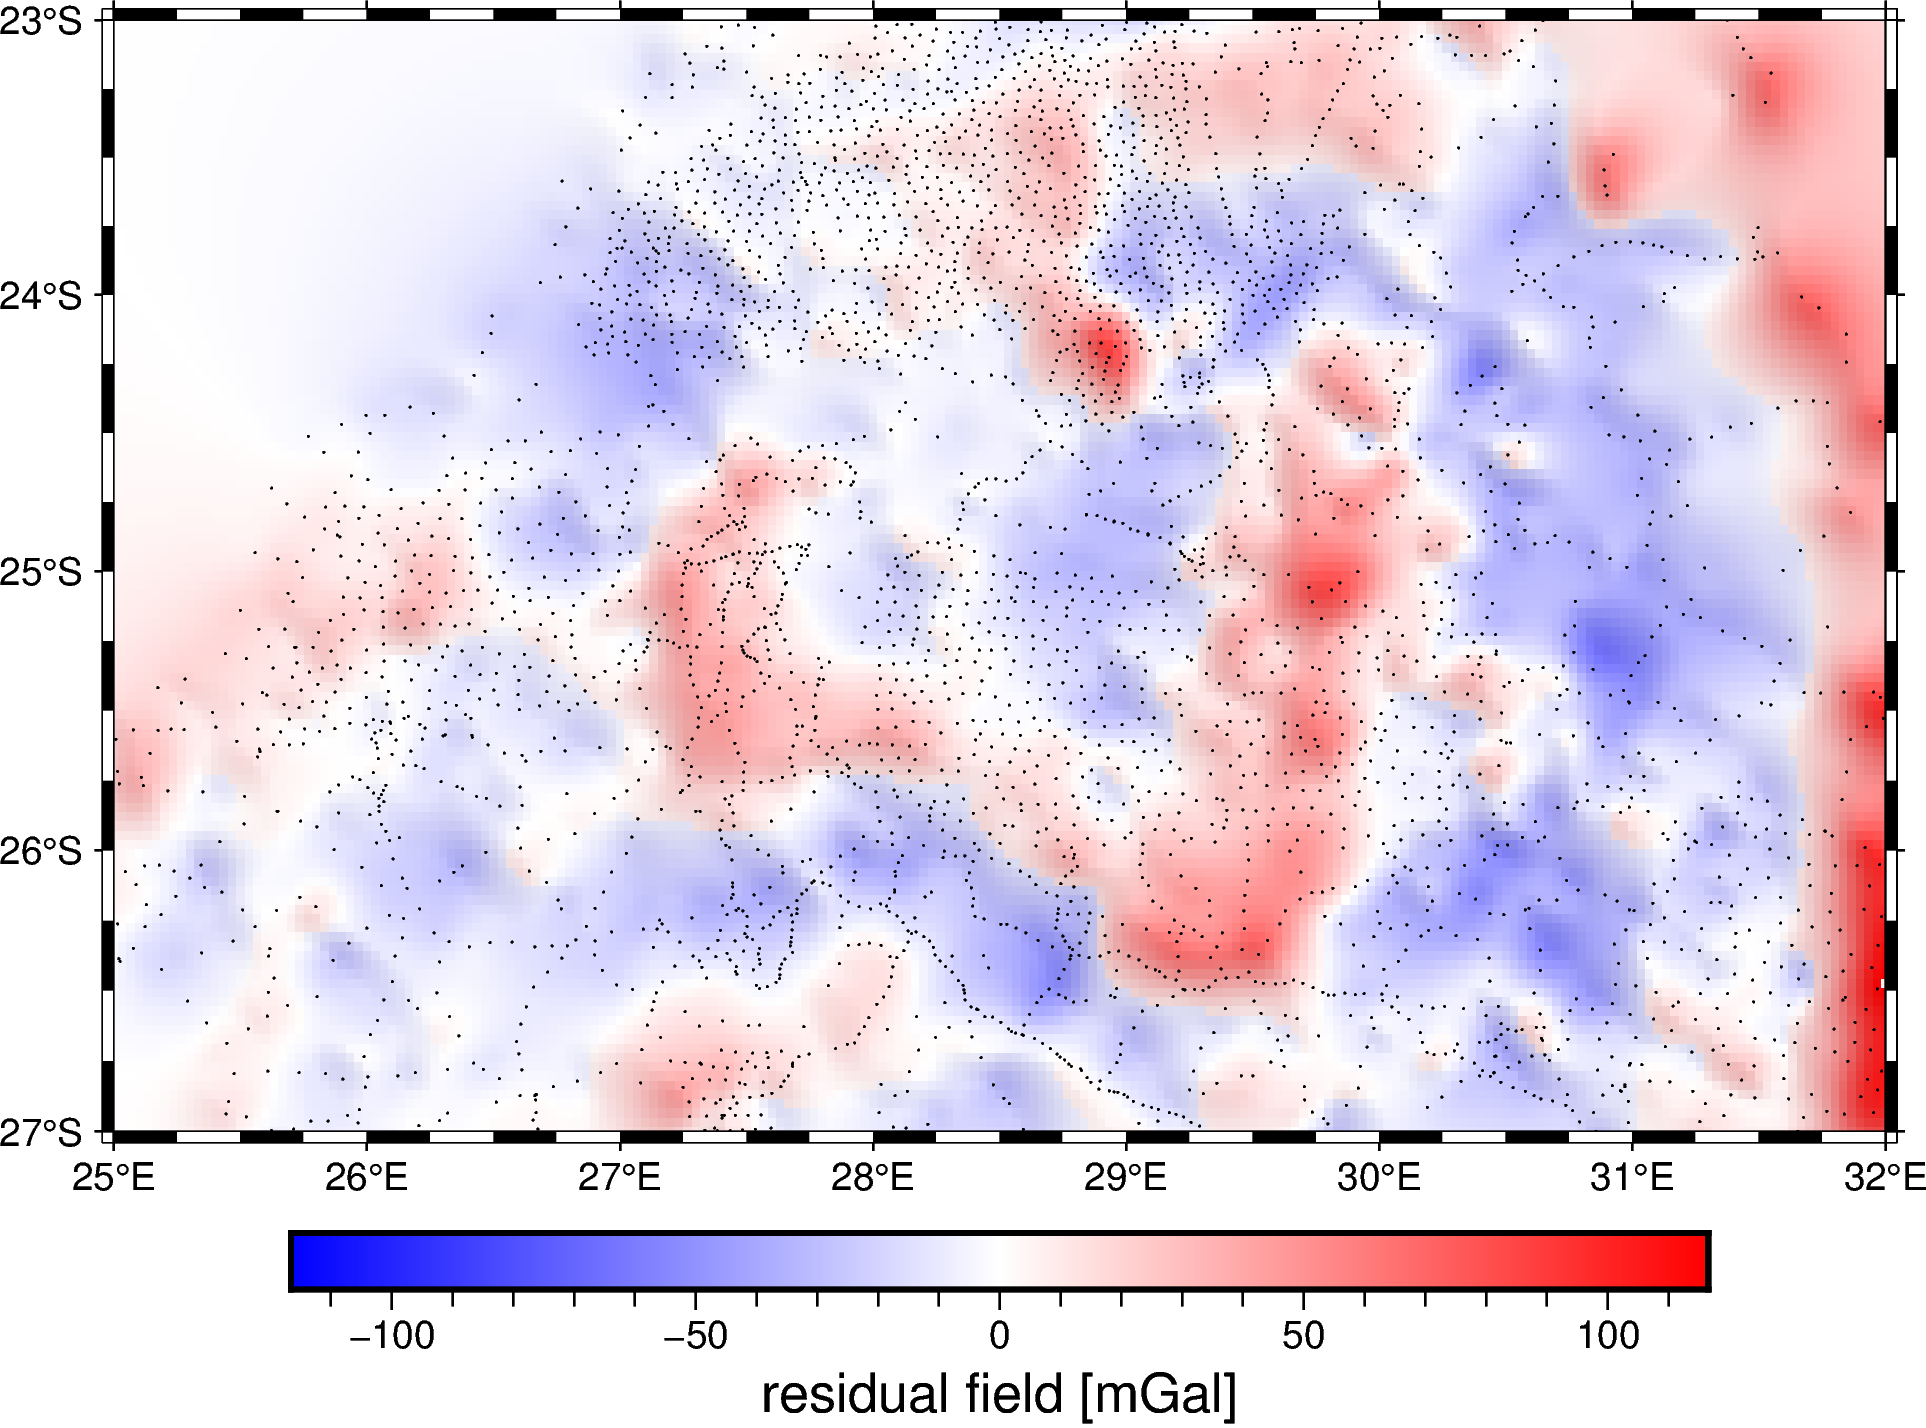

In [27]:
fig = pygmt.Figure()
scale = vd.maxabs(residual_grid.gravity_residual)
pygmt.makecpt(cmap="polar", series=[-scale, scale], no_bg=True)
fig.grdimage(
    residual_grid.gravity_residual,
    shading="+a45+nt0.15",
    projection="M15c",
    frame=True,
)
fig.colorbar(frame='af+l"residual field [mGal]"')
fig.plot(
    x=data.longitude,
    y=data.latitude,
    style="c0.02c",
    color="black",
)
fig.show()

## Where to go next

**Congratulations!** You've now completed our gravity processing tutorial. Here are few things you can do now:

* Try using your own data.
* Change the values of certain parameters (topographic density, equivalent source depth, etc) and see what happens.
* Learn more about the individual packages by reading their documentation: https://www.fatiando.org/learn

---

## License

All Python source code is made available under the BSD 3-clause license. You
can freely use and modify the code, without warranty, so long as you provide
attribution to the authors.

Unless otherwise specified, all figures and Jupyter notebooks are available
under the Creative Commons Attribution 4.0 License (CC-BY).

The full text of these licenses is provided in the [`LICENSE.txt`](LICENSE.txt)
file.